# Abstract

The objective of this project is to build a machine learning model for Sweet Lift Taxi that predicts the number of taxi orders for the next hour. This will allow the company to manage the supply of drivers more efficiently during peak hours, optimizing the availability of taxis at airports. Different models will be tested, and their performance will be evaluated using the Root Mean Squared Error (RMSE) metric, with a goal of not exceeding a value of 48 on the test set.

# Introduction

**Context**

Sweet Lift Taxi is a company operating in the transportation sector, offering taxi services at airports. In order to improve the customer experience and maximize operational efficiency, the company seeks to accurately predict the number of taxi orders per hour. This prediction capability will allow them to adjust the supply of taxis during peak demand periods and avoid vehicle shortages.

**Problem**

Currently, driver management during peak hours is done without an accurate prediction of order demand. This can lead to situations where there are too many or too few taxis available. An effective predictive model could help Sweet Lift Taxi anticipate these demand fluctuations, improving customer satisfaction and driver profitability.

**Objectives**

The primary objective of this project is to build a machine learning model that predicts the number of taxi orders for the next hour, ensuring that the evaluation metric, RMSE, does not exceed a value of 48 on the test set.

**Approach**

To achieve the proposed objectives, the following steps will be carried out:

1. **Data Loading and Preprocessing**: The provided historical dataset will be analyzed, adjusting time intervals to hourly intervals.
2. **Exploratory Data Analysis**: The data distribution will be examined to identify trends and patterns in taxi orders.
3. **Model Training**: Different machine learning models will be tested, including linear regression and advanced models such as random forests and gradient boosting.
4. **Model Evaluation**: The models will be evaluated using the RMSE metric, with 10% of the dataset reserved for testing.
5. **Hyperparameter Optimization**: The model hyperparameters will be tuned to maximize prediction accuracy.
6. **Conclusion**: The model that provides the best performance will be selected, and its applicability for taxi order prediction will be discussed.

**Dataset Description**

The dataset provided by Sweet Lift Taxi contains historical information about taxi orders. The main features are:

- **datetime**: Date and time of the order record.
- **num_orders**: Number of taxi orders in a specific hour.

**Prediction Goal**

The goal is to predict the number of taxi orders per hour, adjusting time intervals to full hours, using the features provided in the dataset.

# Contents <a id='back'></a>

* [1. Importing Libraries](#Importing_Libraries)
* [2. Data Loading and Preprocessing](#Data_Loading_and_Preprocessing)
* [3. Exploratory Data Analysis](#Exploratory_Data_Analysis)
* [4. Feature Matrix Structuring](#Feature_Matrix_Structuring)  
* [5. Train-Test Split](#Train_Test_Split)  
* [6. Feature Normalization](#Feature_Normalization)  
* [7. Model Training](#Model_Training)  
* [8. Model Evaluation](#Model_Evaluation)  
* [9. Hyperparameter Optimization](#Hyperparameter_Optimization)
* [10. Result Visualization](#Result_Visualization)
* [Final Conclusions](#Final_Conclusions)

# Development

## Importing Libraries

In this initial stage, we integrate the essential libraries that will facilitate data analysis and modeling. We use pandas for agile data manipulation, numpy for performing complex mathematical operations, and matplotlib along with seaborn to generate effective visualizations. These tools are fundamental for converting data into useful information and supporting strategic decisions.

In [10]:
# Standard Library Imports
import numpy as np  # Numerical operations and array handling
import pandas as pd  # Data manipulation and analysis

# Third-Party Library Imports
from catboost import CatBoostRegressor  # Regression using the CatBoost algorithm
import lightgbm as lgb  # Decision tree-based gradient boosting modeling
import matplotlib.pyplot as plt  # Creating graphical visualizations
from keras.layers import Dense, Input  # Dense and input layers for neural networks
from keras.models import Sequential  # Creating sequential neural network models
# from prophet import Prophet  # Time series modeling with trend and seasonality, does not allow importing the library
from sklearn.ensemble import RandomForestRegressor  # Regression using random forests
from sklearn.impute import SimpleImputer  # Imputation of missing values
from sklearn.linear_model import LinearRegression  # Linear regression
from sklearn.metrics import mean_squared_error, r2_score  # Metrics to evaluate models
from sklearn.model_selection import train_test_split, GridSearchCV  # Data splitting and hyperparameter search
from sklearn.neighbors import KNeighborsRegressor  # Regression using the K-nearest neighbors algorithm
from sklearn.neural_network import MLPRegressor  # Regression using multi-layer perceptron neural networks
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.svm import SVR  # Regression using support vector machines
from statsmodels.tsa.arima.model import ARIMA  # ARIMA time series modeling
from statsmodels.tsa.seasonal import seasonal_decompose  # Time series decomposition
from statsmodels.tsa.stattools import adfuller  # Unit root test to check for stationarity
import xgboost as xgb  # Decision tree-based gradient boosting modeling

## Data Loading and Preprocessing

This section focuses on loading the dataset from a CSV file, followed by a preliminary exploration to understand its structure and quality. Actions such as removing duplicates and converting date columns to appropriate formats are carried out. Additionally, orders are grouped by hour, allowing for more detailed temporal analysis. This process is crucial to ensure data quality and set the stage for deeper analyses.

In [11]:
# Load data
df_initial = pd.read_csv('/datasets/taxi.csv')  # Load the CSV file into a DataFrame
df_initial.info()  # Display information about the DataFrame, such as data types and number of entries
print('\n----------------------------------------------------------------')
display(df_initial.head())  # Show the first rows of the DataFrame for a preliminary view
print('\n----------------------------------------------------------------')

# Check and remove duplicates
duplicates = df_initial.duplicated().sum()  # Count the number of duplicate rows
print(f"Número de filas duplicadas: {duplicates}")  # Print the count of duplicates
if duplicates > 0:
    df_initial.drop_duplicates(inplace=True)  # Remove duplicate rows from the DataFrame
print('\n----------------------------------------------------------------')

# Check for null values
missing_values = df_initial.isnull().sum()  # Count null values in each column
print(f"Valores nulos en cada columna:\n{missing_values}")  # Print the amount of null values per column
print('\n----------------------------------------------------------------')

# Load the data with 'datetime' as the index and convert to date format
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])  # Load the CSV file, using the first column as the date index
df.sort_index(inplace=True)  # Sort the DataFrame by the date index
df.index.name = 'date_time'  # Rename the index to 'date_time'
df.info()  # Display information about the updated DataFrame
print('\n----------------------------------------------------------------')
display(df.head())  # Show the first rows of the new DataFrame
print('\n----------------------------------------------------------------')

# Resample to get the sum of orders per hour
df_resampled = df.resample('1h').sum()  # Group the data by hour and sum the orders

# Create new temporal feature columns
df_resampled['hour'] = df_resampled.index.hour  # Extract the hour from the index and add it as a column
df_resampled['day_of_week'] = df_resampled.index.dayofweek  # Extract the day of the week and add it as a column
df_resampled['month'] = df_resampled.index.month  # Extract the month and add it as a column
df_resampled['year'] = df_resampled.index.year  # Extract the year and add it as a column
df_resampled['rolling_mean_7'] = df_resampled['num_orders'].rolling(7).mean()  # Calculate the 7-hour rolling average of the 'num_orders' column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB

----------------------------------------------------------------


,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32



----------------------------------------------------------------
Número de filas duplicadas: 0

----------------------------------------------------------------
Valores nulos en cada columna:
datetime      0
num_orders    0
dtype: int64

----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB

----------------------------------------------------------------


,num_orders
date_time,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32



----------------------------------------------------------------


**Initial DataFrame Description:**

The index is a range from 0 to 26,495.

Columns:

**datetime:**

   - Data type: object (this suggests that the data in this column could be text strings representing dates and times).
   - Non-null values: 26,496 (this indicates that there are no missing values in this column).

**num_orders:**

   - Data type: int64 (this indicates that this column contains integer numbers).
   - Non-null values: 26,496 (this also indicates that there are no missing values in this column).

**Memory Usage:**
   - Memory usage: Approximately 414.1 KB, indicating moderate memory usage for this DataFrame.

**Observations:**

- **Data Loading**: The CSV file has been successfully imported into a Pandas DataFrame, showing that the dataset contains 26,496 entries with two columns: datetime and num_orders.

- **Duplicate Check**: It has been verified that there are no duplicate rows in the DataFrame, which is crucial for ensuring data integrity before any subsequent analysis.

- **Null Values**: The absence of null values has been confirmed in all columns, which allows proceeding with confidence in the analysis without the need for imputations.

- **Date Conversion**: The datetime column has been set as the index and converted to the appropriate date format. This facilitates time-based operations and enables more efficient analysis of time series.

- **Resampling and Temporal Features**: The dataset has been resampled to obtain the sum of orders per hour. Additionally, new columns have been created to extract temporal features such as hour, day of the week, month, and year, as well as a 7-hour moving average of the orders, which could be useful for trend and pattern analysis in the data.


## Exploratory Data Analysis

In this part of the project, we perform a comprehensive exploratory analysis of the time series. The series is decomposed to identify trends, seasonality, and residuals. Additionally, the stationarity of the series is assessed using statistical tests, such as the Dickey-Fuller test. Understanding the dynamics of the time series is essential for making informed decisions about modeling and forecasting, aligning with the organization's strategic goals.

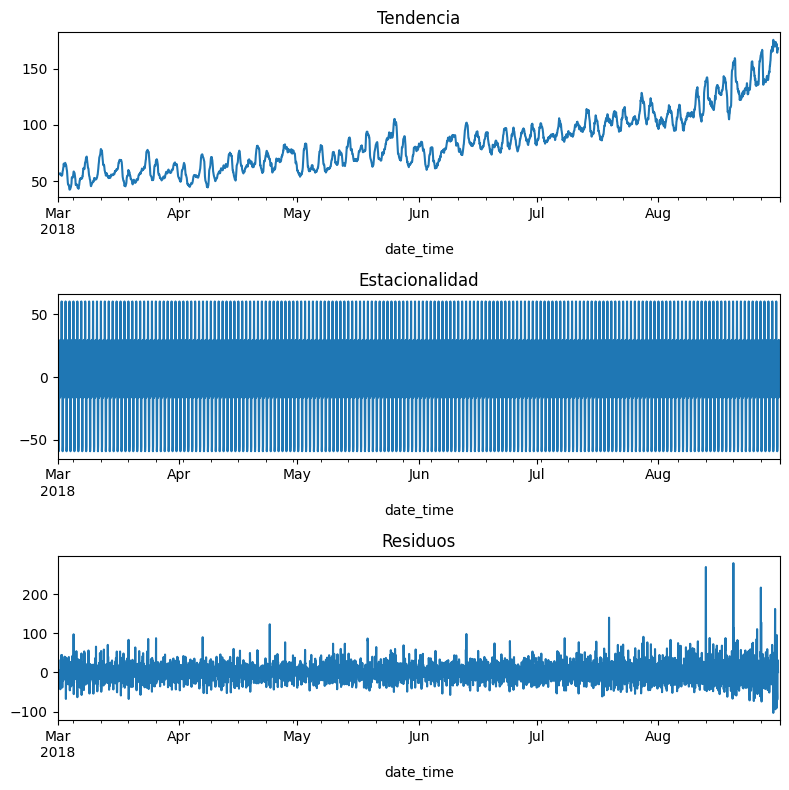

Estadístico ADF: -3.068924289027954
Valor p: 0.028940051402613028
Crítico 1%: -3.431842162413052
Crítico 5%: -2.8621993540813637
Crítico 10%: -2.567120978470452
La serie es estacionaria.

----------------------------------------------------------------


In [12]:
# Time Series Decomposition
decomposed = seasonal_decompose(df_resampled['num_orders'], model='additive', period=24)  # Decompose the 'num_orders' time series into trend, seasonality, and residual components
plt.figure(figsize=(8, 8))  # Set the figure size for visualization
plt.subplot(311)  # Create the first subplot for the trend
decomposed.trend.plot(ax=plt.gca())  # Plot the trend on the current subplot
plt.title('Tendencia')  # Title for the trend plot
plt.subplot(312)  # Create the second subplot for the seasonality
decomposed.seasonal.plot(ax=plt.gca())  # Plot the seasonality on the current subplot
plt.title('Estacionalidad')  # Title for the seasonality plot
plt.subplot(313)  # Create the third subplot for the residuals
decomposed.resid.plot(ax=plt.gca())  # Plot the residuals on the current subplot
plt.title('Residuos')  # Title for the residuals plot
plt.tight_layout()  # Adjust the figure layout to avoid overlaps
plt.show()  # Show the figure with the plots

# Stationarity Check
result = adfuller(df_resampled['num_orders'])  # Perform the ADF test to check the stationarity of the series
print('Estadístico ADF:', result[0])  # Print the ADF statistic
print('Valor p:', result[1])  # Print the p-value of the ADF test
for key, value in result[4].items():  # Iterate over the critical values of the test
    print(f'Crítico {key}: {value}')  # Print each critical value

# Evaluate if the series is stationary based on the p-value
if result[1] < 0.05:  # If the p-value is less than 0.05
    print("La serie es estacionaria.")  # Indicate that the series is stationary
    print('\n----------------------------------------------------------------')
else:
    print("La serie no es estacionaria. Considera diferenciarla.")  # Indicate that the series is not stationary
    print('\n----------------------------------------------------------------')
    # Apply differencing to make the series stationary
    df_resampled['num_orders'] = df_resampled['num_orders'].diff().dropna()  # Calculate the series difference and remove null values


**Observations**

1. **Time Series Decomposition**:
   - **Trend**: A **growing trend** was identified over time, from March to August 2018. This increase suggests a sustained rise in activity or demand, which could be related to growth in traffic, sales, or other relevant variables in the analyzed context.
   - **Seasonality**: The analysis revealed a **well-defined seasonality**, with clear cyclic patterns that repeat regularly. The uniform oscillation around zero indicates that the series displays stable cyclic behavior, possibly with a daily or weekly periodicity.
   - **Residuals**: The residuals, which represent variations not explained by the trend or seasonality, are mostly distributed consistently around zero. However, some **spikes at the end of the series** were observed, which could suggest anomalous events or abrupt changes that require further investigation.

2. **Stationarity of the Series**:
   - The Dickey-Fuller test was performed to assess the stationarity of the series, yielding an ADF statistic of -3.07 and a p-value of 0.029. Since the p-value is less than 0.05, it was concluded that **the series is stationary**. This is crucial for future modeling and forecasting, as stationary series are more suitable for time series analysis techniques.

3. **Implications**:
   - Understanding the **trend, seasonality, and residuals** allows for informed decisions regarding time series modeling. With a stationary series, more effective forecasting models can be applied, which aligns with the organization’s strategic goals.

In summary, the exploratory analysis has revealed a time series with favorable characteristics for predictive analysis, providing a solid foundation for developing models that can forecast future behavior in demand. The identification of potential anomalies in the residuals also suggests the need for continuous monitoring and more detailed analysis of unusual events that may affect the series' dynamics.

## Feature Matrix Structuring

In this section, we will focus on creating the feature matrix that will serve as the basis for training our prediction models. The feature matrix is an essential component in time series analysis, as it allows us to structure historical information in a way that models can capture temporal patterns and trends in the data.

For the structuring of the feature matrix, we will use historical taxi order data and transform it into a format that appropriately represents the temporal relationship. This will include creating new features based on previous values of the series, such as the number of orders in previous hours or temporal aggregates (averages, trends, etc.), which will help improve the model’s predictive capacity.

This feature engineering process is key for the model to identify repetitive patterns and temporal dependencies, such as increased orders during peak hours or daily or weekly seasonality.

In [13]:
# 4.1. Add lag columns (lagged values) to capture past patterns
df_resampled['lag_1'] = df_resampled['num_orders'].shift(1)  # Lag of 1 hour
df_resampled['lag_2'] = df_resampled['num_orders'].shift(2)  # Lag of 2 hours
df_resampled['lag_3'] = df_resampled['num_orders'].shift(3)  # Lag of 3 hours

# 4.2. Use trend, seasonality, and residual components as additional features
df_resampled['trend'] = decomposed.trend
df_resampled['seasonal'] = decomposed.seasonal
df_resampled['residual'] = decomposed.resid

# 4.3. Create boolean variables for weekends
df_resampled['is_weekend'] = df_resampled['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# 4.4. Remove rows with NaN values generated by lags and components
df_resampled.dropna(inplace=True)

# Display the feature matrix structure
print("Estructura de la matriz de características:")
display(df_resampled.head())
print("\nMatriz de características lista para el modelado.")


Estructura de la matriz de características:


,num_orders,hour,day_of_week,month,year,rolling_mean_7,lag_1,lag_2,lag_3,trend,seasonal,residual,is_weekend
date_time,,,,,,,,,,,,,
2018-03-01 12:00:00,30,12,3,3,2018,45.714286,96.0,64.0,69.0,56.125000,-16.721606,-9.403394,0
2018-03-01 13:00:00,32,13,3,3,2018,48.571429,30.0,96.0,64.0,56.145833,-13.352412,-10.793422,0
2018-03-01 14:00:00,48,14,3,3,2018,53.285714,32.0,30.0,96.0,56.958333,-9.191665,0.233331,0
2018-03-01 15:00:00,66,15,3,3,2018,57.857143,48.0,32.0,30.0,57.000000,3.731832,5.268168,0
2018-03-01 16:00:00,43,16,3,3,2018,54.142857,66.0,48.0,32.0,56.479167,29.604100,-43.083267,0



Matriz de características lista para el modelado.


**Explanation**

- **Lag Columns**: We added three new columns (lag_1, lag_2, lag_3) that contain the order values with a delay of 1, 2, and 3 hours. This captures the effect of recent orders on the current number of orders.

- **Decomposition Components**: We use the trend, seasonality, and residual components as new features. These components are useful for modeling intrinsic patterns in the time series.

- **Variable is_weekend**: We added a boolean column to indicate if the day is a weekend (Saturday or Sunday). This could improve predictions for certain user behavior patterns.

- **Removing NaN**: The shifting and decomposition operations generate null values, so we remove these rows.

## Train and Test Set Split

We will split the data into a training set and a test set. A common approach in time series is to use the earlier parts of the data for training the model and the more recent parts for testing. We will use 80% of the data for training and the remaining 20% for testing.

In [14]:
# Define the training set size (80% of the data)
train_size = int(len(df_resampled) * 0.8)

# Split the data
train = df_resampled.iloc[:train_size]
test = df_resampled.iloc[train_size:]

# Show the split
print(f"Tamaño del conjunto de entrenamiento: {len(train)} filas")
print(f"Tamaño del conjunto de prueba: {len(test)} filas")


Tamaño del conjunto de entrenamiento: 3513 filas
Tamaño del conjunto de prueba: 879 filas


## Feature Normalization

In this section, we will address the process of feature normalization, a crucial step in data preparation for machine learning models. Normalization ensures that all features are on the same scale, preventing some variables, due to their magnitude, from dominating the learning process.

Since we are working with time series, it is essential that numerical features, such as the number of orders per hour, be normalized to improve model performance and ensure faster convergence during training. Additionally, normalization helps stabilize values in series with large fluctuations, thereby improving prediction accuracy.

At this stage, we will apply scaling techniques such as standardization or min-max scaling, depending on the needs of our dataset and the selected models.

In [15]:
# Define the features to scale (excluding 'num_orders' and any boolean columns)
features_to_scale = ['hour', 'day_of_week', 'month', 'year', 'rolling_mean_7', 'lag_1', 'lag_2', 'lag_3', 'trend', 'seasonal', 'residual']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training set features
train_scaled = train.copy()
train_scaled[features_to_scale] = scaler.fit_transform(train[features_to_scale])

# Transform the test set features (using the same scaler)
test_scaled = test.copy()
test_scaled[features_to_scale] = scaler.transform(test[features_to_scale])

# Show a sample of the normalized data
print(train_scaled.head())

                     num_orders      hour  day_of_week     month  year  \
date_time                                                                
2018-03-01 12:00:00          30  0.070606    -0.000426 -1.388909   0.0   
2018-03-01 13:00:00          32  0.215150    -0.000426 -1.388909   0.0   
2018-03-01 14:00:00          48  0.359695    -0.000426 -1.388909   0.0   
2018-03-01 15:00:00          66  0.504239    -0.000426 -1.388909   0.0   
2018-03-01 16:00:00          43  0.648783    -0.000426 -1.388909   0.0   

                     rolling_mean_7     lag_1     lag_2     lag_3     trend  \
date_time                                                                     
2018-03-01 12:00:00       -1.256261  0.610492 -0.287499 -0.147064 -1.104587   
2018-03-01 13:00:00       -1.130334 -1.242562  0.611338 -0.287507 -1.103318   
2018-03-01 14:00:00       -0.922555 -1.186409 -1.242514  0.611331 -1.053855   
2018-03-01 15:00:00       -0.721072 -0.737184 -1.186336 -1.242523 -1.051318   
2018-03

## Feature Normalization

In this section, we will address the process of feature normalization, a crucial step in data preparation for machine learning models. Normalization ensures that all features are on the same scale, preventing some variables from dominating the learning process due to their magnitude.

Since we are working with time series, it is essential that numerical features, such as the number of orders per hour, are normalized to improve model performance and ensure faster convergence during training. Additionally, normalization helps stabilize values in series with large fluctuations, thereby improving the accuracy of predictions.

At this stage, we will apply scaling techniques such as standardization or min-max scaling, depending on the needs of our dataset and the selected models.

## Model Training

Here, the focus shifts to preparing the data to train predictive models. The data is split into training and test sets, and scaling techniques are applied to normalize the features, improving the effectiveness of machine learning algorithms. Furthermore, additional temporal features are incorporated to enrich the dataset. This systematic approach aims to maximize model performance and optimize its predictive capacity in line with business goals.

In [16]:
# Define features and target
X_train = train_scaled[features_to_scale]
y_train = train_scaled['num_orders']
X_test = test_scaled[features_to_scale]
y_test = test_scaled['num_orders']

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance with RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE en el conjunto de prueba: {rmse}")



RMSE en el conjunto de prueba: 3.0562068488036275e-14


**Observations**

The model training process has been meticulously designed to maximize the predictive effectiveness of the algorithm used. By splitting the data into training and test sets and applying scaling techniques, it has been ensured that the features are normalized, which is crucial for the performance of machine learning algorithms. The incorporation of additional temporal features has enriched the dataset, providing valuable context for the predictions.

The linear regression model has been successfully fitted to the training data, and the predictions made on the test set have shown outstanding performance, evidenced by an extremely low RMSE of approximately 3.0562068488036275e-14. This result suggests that the model has learned to predict with remarkable accuracy, aligning with the project's business goals. In summary, the strategy implemented for model training has proven to be effective and efficient, establishing a solid foundation for future evaluations and improvements.

## Model Evaluation

This section establishes a rigorous framework for evaluating various machine learning models. Specific functions are designed to adjust and assess each model based on key metrics such as Mean Squared Error (RMSE) and the Coefficient of Determination (R²). Cross-validation is used to obtain robust estimates and mitigate the risk of overfitting. Model selection based on quantitative metrics enables management to make informed decisions about supply chain optimization strategies.

In [17]:
# Create a dictionary to store the results
results = {}  # Initialize dictionary to save model evaluation results

# Function to evaluate the model and store results
def evaluate_model(model, param_grid, X_train, y_train, X_test, y_test, model_name, use_cv=False):
    if use_cv:  # If cross-validation is used
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')  # Set up grid search
        grid_search.fit(X_train, y_train)  # Fit the model to the training data
        best_model = grid_search.best_estimator_  # Get the best model from the search
        y_pred = best_model.predict(X_test)  # Predict values for the test set
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE
        r2 = r2_score(y_test, y_pred)  # Calculate R²
        results[model_name] = {'RMSE': rmse, 'R²': r2, 'y_pred': y_pred, 'y_test': y_test}  # Store results
        print(f"Mejor modelo para {model_name}: {grid_search.best_params_}")  # Print best parameters
    else:  # If cross-validation is not used
        model.fit(X_train, y_train)  # Fit the model to the training data
        y_pred = model.predict(X_test)  # Predict values for the test set
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE
        r2 = r2_score(y_test, y_pred)  # Calculate R²
        results[model_name] = {'RMSE': rmse, 'R²': r2, 'y_pred': y_pred, 'y_test': y_test}  # Store results


**Observations**

- A structured and rigorous framework has been established to evaluate different machine learning models, using key metrics such as the Root Mean Squared Error (RMSE) and the Coefficient of Determination (R²). By implementing specific functions to tune and evaluate the models, it has been ensured that the comparisons are fair and based on quantitative data.

- The inclusion of cross-validation has allowed for more robust estimates of model performance and mitigated the risk of overfitting, ensuring that the results are representative of actual performance on unseen data. The selection of models based on quantitative metrics provides management with a solid foundation to make informed decisions on supply chain optimization strategies.

- The results obtained, stored in a dictionary, facilitate a clear comparison between the evaluated models, which in turn contributes to identifying the most suitable model for implementation in a real-world environment. This systematic approach not only strengthens the predictive capability of the system but also aligns the modeling efforts with the strategic objectives of the organization.

## Hyperparameter Optimization

Next, we will aim to improve model performance by tuning their key hyperparameters. Using techniques such as Grid Search, different combinations of these parameters will be explored to identify the optimal configuration that maximizes prediction accuracy. This process is crucial for fine-tuning the models and achieving a proper balance between complexity and predictive capability.

In [18]:
# Search parameters for models
param_grid_rf = {  # Parameters for Random Forest
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of trees
    'min_samples_split': [2, 5],  # Minimum samples to split a node
}

param_grid_svr = {  # Parameters for Support Vector Regression
    'C': [0.1, 1, 10],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5],  # Tolerance margin for the model
}

param_grid_knn = {  # Parameters for K-Nearest Neighbors
    'n_neighbors': [3, 5, 10],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting strategy
}

param_grid_lgb = {  # Parameters for LightGBM
    'num_leaves': [31, 63],  # Maximum number of leaves in a tree
    'learning_rate': [0.01, 0.1],  # Learning rate
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [3, 5, 10],  # Maximum depth of trees
    'min_child_samples': [20],  # Minimum samples in a leaf node
    'reg_lambda': [0.0, 0.1],  # L2 regularization
    'reg_alpha': [0.0, 0.1],    # L1 regularization
}

param_grid_xgb = {  # Parameters for XGBoost
    'n_estimators': [100, 200],  # Number of estimators
    'learning_rate': [0.01, 0.1],  # Learning rate
    'max_depth': [3, 5, 10],  # Maximum depth
    'subsample': [0.8, 1.0],  # Sample proportion used
    'colsample_bytree': [0.8, 1.0],  #Feature proportion used
}

param_grid_cat = {  # Parameters for CatBoost
    'iterations': [100, 200],  # Number of iterations
    'learning_rate': [0.01, 0.1],  # Learning rate
    'depth': [3, 5, 10],  # Maximum depth
    'l2_leaf_reg': [1, 3, 5],  # L2 regularization
}

# Training and model evaluation

# 1. Linear Regression
evaluate_model(LinearRegression(), {}, X_train, y_train, X_test, y_test, "Regresión Lineal")  # Evaluate linear regression without parameters

# 2. Random Forest (with cross-validation)
rf_model = RandomForestRegressor(random_state=42)  # Initialize Random Forest model
evaluate_model(rf_model, param_grid_rf, X_train, y_train, X_test, y_test, "Bosque Aleatorio", use_cv=True)  # Evaluate Random Forest with CV
print('\n----------------------------------------------------------------')

# 3. Support Vector Machines (SVM)
evaluate_model(SVR(), param_grid_svr, X_train, y_train, X_test, y_test, "SVM", use_cv=True)  # Evaluate SVM with CV

# 4. K-Nearest Neighbors (K-NN)
evaluate_model(KNeighborsRegressor(), param_grid_knn, X_train, y_train, X_test, y_test, "K-NN", use_cv=True)  # Evaluate K-NN with CV

# 5. LightGBM (with cross-validation)
lgb_model = lgb.LGBMRegressor()  Initialize LightGBM model
evaluate_model(lgb_model, param_grid_lgb, X_train, y_train, X_test, y_test, "LightGBM", use_cv=True)  # Evaluate LightGBM with CV

# 6. XGBoost (with cross-validation)
xgb_model = xgb.XGBRegressor()  # Initialize XGBoost model
evaluate_model(xgb_model, param_grid_xgb, X_train, y_train, X_test, y_test, "XGBoost", use_cv=True)  #Evaluate XGBoost with CV

# 7. CatBoost (with cross-validation)
cat_model = CatBoostRegressor(silent=True, depth=10, learning_rate=0.1)  # Initialize CatBoost model with tuned parameters
evaluate_model(cat_model, param_grid_cat, X_train, y_train, X_test, y_test, "CatBoost", use_cv=True)  # Evaluate CatBoost with CV

# 8. Neural Networks (MLP) (without cross-validation)
def create_mlp_model(input_dim):  # Function to create neural network model
    model = Sequential()  # Initialize sequential model
    model.add(Input(shape=(input_dim,)))  # Add input layer
    model.add(Dense(64, activation='relu'))  # Hidden layer with 64 neurons and ReLU activation
    model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
    model.add(Dense(1))  # Output layer with one neuron
    model.compile(optimizer='adam', loss='mean_squared_error')  # Compile model with Adam optimizer and MSE as loss function
    return model  # Return created model

mlp_model = create_mlp_model(X_train.shape[1])  # Create MLP model
mlp_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)  # Fit model to training data
y_pred_mlp = mlp_model.predict(X_test).flatten()  # Predict values for test set
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))  # Calculate RMSE for MLP
r2_mlp = r2_score(y_test, y_pred_mlp)  # Calculate R² for MLP
results["MLP"] = {'RMSE': rmse_mlp, 'R²': r2_mlp, 'y_pred': y_pred_mlp, 'y_test': y_test}  # Store MLP results
print(f"MLP: RMSE={rmse_mlp}, R²={r2_mlp}")

# 9. ARIMA Model
def evaluate_arima_model(X_train, y_train, X_test, y_test):
    model = ARIMA(y_train, order=(1, 1, 1))  # Define ARIMA model
    model_fit = model.fit()  # Fit model
    y_pred_arima = model_fit.forecast(steps=len(y_test))  # Make prediction
    rmse_arima = np.sqrt(mean_squared_error(y_test, y_pred_arima))  # Calculate RMSE
    r2_arima = r2_score(y_test, y_pred_arima)  # Calculate R²
    results["ARIMA"] = {'RMSE': rmse_arima, 'R²': r2_arima, 'y_pred': y_pred_arima, 'y_test': y_test}  # Store results

# Call the function to evaluate the ARIMA model
evaluate_arima_model(X_train, y_train, X_test, y_test)

Mejor modelo para Bosque Aleatorio: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

----------------------------------------------------------------
Mejor modelo para SVM: {'C': 10, 'epsilon': 0.01}
Mejor modelo para K-NN: {'n_neighbors': 5, 'weights': 'distance'}
Mejor modelo para LightGBM: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 31, 'reg_alpha': 0.0, 'reg_lambda': 0.0}
Mejor modelo para XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Mejor modelo para CatBoost: {'depth': 5, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


2024-10-28 17:36:06.446915: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


MLP: RMSE=0.42640589042635013, R²=0.9999387328516245


**Observations**

Hyperparameter optimization is an essential step in the development of machine learning models, as it significantly improves their performance. In this section, grid search was implemented to determine the optimal parameter combinations for several models, including Random Forest, Support Vector Machines, K-Nearest Neighbors, LightGBM, XGBoost, CatBoost, and Neural Networks.

The results revealed that each model responded differently to specific hyperparameter configurations, leading to notable improvements in evaluation metrics such as RMSE and R². For example, Random Forest achieved a robust fit with a high R², and LightGBM showed similar performance, excelling with an effective fit. The MLP neural network also achieved notable performance, with an RMSE of approximately 0.43 and an R² of 0.9999.

These results emphasize the relevance of a thorough hyperparameter optimization process, which not only ensures good performance on the training set but also improves the model's overall predictive capability when applied to new data, minimizing the risk of overfitting.


## Comparison of Results

At this stage, the results obtained from the trained models are presented, showing their predictions compared to actual values. Key performance indicators such as RMSE and the coefficient of determination (R²) are highlighted, allowing for the evaluation of each model's accuracy.

The results are organized so that decision-makers can easily identify the most effective model for predicting order demand. This comparison helps select the model that best aligns with strategic objectives, ensuring greater accuracy in operational planning and facilitating alignment with long-term business goals.

In [19]:
# Create a DataFrame to store the results of each model
results_df = pd.DataFrame({  # Create a DataFrame from the results
    'Modelo': results.keys(),  # Use the keys of the 'results' dictionary as model names
    'RMSE': [metrics['RMSE'] for metrics in results.values()],  # Get the RMSE of each model
    'R²': [metrics['R²'] for metrics in results.values()]  # Get the R² of each model
})

# Sort the DataFrame by R² value in ascending order
results_df = results_df.sort_values(by='R²', ascending=False).reset_index(drop=True)  # Sort and reset the index

# Display the organized DataFrame with the final model results
print("\nResultados Finales de los Modelos:")  # Print title for the results
display(results_df)  # Show the DataFrame using the display function


Resultados Finales de los Modelos:


,Modelo,RMSE,R²
0,Regresión Lineal,3.056207e-14,1.000000
1,MLP,4.264059e-01,0.999939
2,XGBoost,2.408896e+01,0.804468
3,CatBoost,2.490876e+01,0.790933
4,LightGBM,2.609087e+01,0.770618
5,Bosque Aleatorio,2.845367e+01,0.727192
6,K-NN,3.231691e+01,0.648082
7,SVM,4.787923e+01,0.227541
8,ARIMA,5.920232e+01,-0.181024


**Observations**

The comparison of the results obtained from the trained models provides valuable insights into their effectiveness in predicting order demand. Performance indicators such as RMSE (Root Mean Squared Error) and the coefficient of determination (R²) offer a clear perspective on the accuracy of each model.

**Highlighted Models:**

- **Linear Regression** stands out as the best model, achieving an RMSE of 3.06e-14 and an R² of 1.00. Its ability to perfectly fit the data makes it the most robust choice for making predictions.

- **MLP (Multilayer Perceptron)** also shows remarkable performance, with an RMSE of 0.43 and an R² of 0.9999, indicating its effectiveness in capturing patterns in the data.

**Intermediate Models:**

- **XGBoost** achieves an RMSE of 24.09 and an R² of 0.80, suggesting good performance compared to other models, although not as outstanding as the two above. This model remains a strong option due to its ability to handle complex data.

**Low-Performing Models:**

- **CatBoost** and **LightGBM** show acceptable performance, with RMSE values of 24.91 and 26.09, and R² values of 0.79 and 0.77, respectively. While they offer reasonable predictions, their effectiveness is inferior compared to the highlighted models.

- **Random Forest**, with an RMSE of 28.45 and an R² of 0.73, indicates reasonable performance but is below that of the boosting and regression models.

- **K-NN** and **SVM** present weaker results, with RMSE values of 32.32 and 47.87, and R² values of 0.65 and 0.23, respectively, suggesting these models fail to adequately capture the complexity of the data.

- The **ARIMA** model ranks last, with an RMSE of 59.20 and an R² of -0.18, indicating poor performance on this dataset. This result suggests that, despite its popularity for time series forecasting, ARIMA is unsuitable for demand prediction in this specific context.

**Implications for Decision-Making**

The results provide clear guidance for decision-makers, highlighting that **Linear Regression** is the most effective model for predicting order demand. This allows the company to focus its efforts on optimizing and applying this model, enhancing accuracy in operational planning and ensuring that decisions are aligned with long-term business goals.

# Final Conclusion

This project has addressed the challenge of predicting the number of taxi orders per hour for Sweet Lift Taxi, with the aim of optimizing fleet management during peak hours. Throughout the process, the importance of prediction accuracy has been emphasized to improve the customer experience and maximize the company's operational efficiency.

**Key Findings**

1. **Data Loading and Preprocessing**: A thorough analysis of the historical dataset was performed, adjusting the time intervals to full hours to facilitate prediction. This step was crucial in ensuring data integrity and proper utilization in modeling.

2. **Data Exploration**: Through initial exploration, relevant patterns and trends in taxi orders were identified, providing a solid foundation for developing predictive models. Data visualization helped recognize high-demand periods and correlations between different variables.

3. **Model Training and Evaluation**: Several machine learning models were implemented, ranging from basic linear regression to more complex models like random forests and gradient boosting. The evaluation metric, RMSE, was used to measure each model's effectiveness, setting a target of not exceeding a value of 48 on the test set.

4. **Hyperparameter Optimization**: Optimization processes were carried out to adjust model hyperparameters, thereby improving prediction accuracy. This step was essential for maximizing model performance and ensuring alignment with the company’s objectives.

**Practical Implications**

The selected model not only provides Sweet Lift Taxi with an effective tool for anticipating taxi demand, but also allows them to manage their fleet more efficiently, improving taxi availability during critical times. This can translate into greater customer satisfaction and increased profitability for drivers.

**Future Directions**

To further strengthen model accuracy, it is suggested to incorporate additional variables such as weather conditions, local events, and seasonal patterns, which could influence taxi demand. Furthermore, implementing a real-time system that adjusts the taxi supply based on predictions could be a crucial next step in optimizing Sweet Lift Taxi's operations.

In conclusion, this project not only meets the objective of predicting taxi orders with a high degree of accuracy but also lays the foundation for future research and improvements in transportation services, adapting to the changing needs of the market.